**Decison Tree- Communities and Crime Data set**
Aim: Predicting the number of violent crimes per 100k population. 

Data from: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

1. Data Cleaning
- Dealing with data types e.g. making categorical data numeric i.e. dummy features
- Handling missing data (Imputing Na values instead of removing)

2. Data Exploration
- Detecting outliers (Tukey IQH or Kernal Density Estimation)
- Plotting Distributions. Log transformation of data that is skewed (very long tails) can impove accuracy.


Balance dataset-to prevent the tree from being biased toward the classes that are dominant. Create an equal number of samples from each class by normalising the sum of the sample weights for each class to the same value.**** not done


3. Feature Enigineering
- Interactions between features
- Increasing dimensionality vs decreasing dimensionality
- Smote? (generates values for the under sampled classes)


4. Feature Selection. Discard the least important variables to reduce noise. Good variables are often constructed using ratios, differences, averages of variables etc. 

5. Split test/ training data and build decision tree. 

6. Pruning 

In [2]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


# Read data and assign NA to missing values 
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])


data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

print(data.head(5))

      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0  

In [3]:
# Take a look at the outcome variable i.e. crime
print(data['ViolentCrimesPerPop'].value_counts())


# need to transform this outcome into 0 and 1's, 0 for low crime, 1 for high crime.
# choose a suitable threshold based, < 2500 crimes is low crime, although this is subjective.
data['ViolentCrimesPerPop'] = [0 if x < 2500 else 1 for x in data['ViolentCrimesPerPop']]


# Then need to split up the features and outcomes
# So x as a data frame of features and y as a series of the outcome variable
x = data.drop('ViolentCrimesPerPop', 1) 
y = data.ViolentCrimesPerPop


print('variables', x.head(5))
print('crime outcome', y.head(5))

223.06     3
624.31     2
115.14     2
28.45      2
84.88      2
          ..
116.10     1
280.44     1
154.77     1
974.36     1
2089.32    1
Name: ViolentCrimesPerPop, Length: 1972, dtype: int64
variables       communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0           2.82          0.80         95.57          3.44  ...   
1           2.43          0.74         94.33          3.43  ...   
2           2.40          1.70         97.35          0.50  ...   
3           2.76          0.53         89.16          1.17  ...   
4           2

In [4]:
# look at data again to see all variables and then y, the outcome, as 0s and 1s 
print(data.head(5))

      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0  

In [5]:
# use get_dummies in pandas OR OneHotEncoder in scikit learn to change categorical data to numerical

print(pd.get_dummies(x['communityname']).head(5))

   Aberdeencity  Aberdeentown  Aberdeentownship  Adacity  Adriancity  \
0             0             0                 0        0           0   
1             0             0                 0        0           0   
2             0             0                 0        0           0   
3             0             0                 0        0           0   
4             0             0                 0        0           0   

   AgouraHillscity  Aikencity  Akroncity  Alabastercity  Alamedacity  ...  \
0                0          0          0              0            0  ...   
1                0          0          0              0            0  ...   
2                0          0          0              0            0  ...   
3                0          0          0              0            0  ...   
4                0          0          0              0            0  ...   

   Yonkerscity  YorbaLindacity  Yorktownship  Yorktowntown  Youngstowncity  \
0            0            

Data Cleaning 
- Decide which categorical variables to use in the model

Models can only handle numerical features, so dummy features are created to transform a categorical feature into a set of dummy features, each representing a unique category. In the set of dummy features, 1 indicates that the observation belongs in that category e.g. female would be 1, male 0.

Dummy features dont have to be used for ones with low frequencies, instead, buckets can be used to bucket low frequency categories as 'other'. 

In [6]:
# Check how many unique categories there are 
for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
            col_name=col_name, unique_cat=unique_cat))

Feature 'communityname' has 2017 unique categories
Feature 'state' has 48 unique categories


In [7]:
# select the features which are not numeric
todummy_list = ['state', 'communityname']

# Dummy all categorical variables used. make them numeric and then missing values can be dealt with.
def dummy_df(data, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(data[x], prefix=x, dummy_na=False)
        data = data.drop(x, 1) # dropping the original feature
        data = pd.concat([data, dummies], axis=1) # adding the one to be used
    return data

x = dummy_df(x, todummy_list)
print(x.head(5))

   countyCode  communityCode  fold  population  householdsize  racepctblack  \
0        45.0        47616.0     1       23123           2.82          0.80   
1         NaN            NaN     1       29344           2.43          0.74   
2        35.0        29443.0     1       16656           2.40          1.70   
3         7.0         5068.0     1       11245           2.76          0.53   
4         NaN            NaN     1      140494           2.45          2.51   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0         95.57          3.44         0.85        11.01  ...   
1         94.33          3.43         2.35        11.36  ...   
2         97.35          0.50         0.70        12.55  ...   
3         89.16          1.17         0.52        24.46  ...   
4         95.65          0.90         0.95        18.09  ...   

   communityname_Yonkerscity  communityname_YorbaLindacity  \
0                          0                             0   
1               

Removing items with missing data

Models can't handle missing data, so features with missing data should be removed. Removing data can cause issues if the data is randomly missing because it can cause the loss of a lot of data. However, greater issues arise from removing data if the data is randomly as well as non-randomly missing because this makes it no longer representative of the whole population and can introduce potential biases. 

Imputation can be used to replace missing values with another value i.e. the mean, median or highest frequency of a given feature. 

In [8]:
# Remove missing values
# First establish how much data is missing
x.isnull().sum().sort_values(ascending=False).head()


# Impute the missing values using SimpleImputer in sklearn.impute
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
x = pd.DataFrame(data=imp.transform(x), columns=x.columns)

In [9]:
# Check if there is still missing data
x.isnull().sum().sort_values(ascending=False).head()

countyCode                       0
communityname_OceanCitycity      0
communityname_OakRidgecity       0
communityname_Oakdalecity        0
communityname_OaklandParkcity    0
dtype: int64

Outlier Detection

An outlier = an observation that deviates drastically from other values in the dataset. Decision trees are robust to outliers because they isolate them in small regions of the feature space. Since the prediction for each leaf is the average (for regression), being isolated in seperate leaves, outliers won't influence the rest of the predictions/ impact the mean of the other leaves. 

Natural vs error:
- Naturally occuring error, although not problematic, can skew the model by affecting the slope
- Error is indicative of data quality issues, therefore it it not information that should be used in the model. Imputation can be used to deal with these erroneous values (the same way as dealing with missing data).

Methods of outlier detection include Kernel density estimation or Tukey IQR.

1. Tukey IQR 
Identifies extreme values in the data and is favourable to using standard deviation from the mean to detect outliers because Tukey doesn't make assumptions about normality and is less sensitive to extreme values. 

(Interquartile ranges). To find most most extreme values, use a diff multiplier to 1.5.

Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

One limitation of Tukey IQR outlier detection is that it does not capture outliers in a bimodal distribution, but rather extreme values, like Kernal Density Estimation can. 

In [10]:
# find outliers using Tukey IQR
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr # The floor = less than the first quartile minus the IQR.
    ceiling = q3 + 1.5*iqr # The ceiling = more than the third quartile plus the IQR.
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)]) # If the value is below the floor, or above the ceiling, it is an outlier
    outlier_values = list(x[outlier_indices]) # indices to access these data points later

    return outlier_indices, outlier_values


# for example, check the outliers for ‘medIncome’
tukey_indices, tukey_values = find_outliers_tukey(x['medIncome'])
print(np.sort(tukey_values))

[ 68654.  68742.  69019.  69695.  69904.  69917.  70000.  70039.  70287.
  70919.  71274.  71905.  71996.  72369.  74124.  74401.  74472.  74825.
  75221.  75905.  76907.  77530.  78965.  79092.  79579.  79797.  80968.
  81957.  83275.  83975.  84441.  84498.  86674.  87686.  89395.  91951.
  95134. 100077. 101320. 110550. 118456. 123625.]


Distribution of Features
- Plotting frequency histograms to show the distribution of a given feature. 

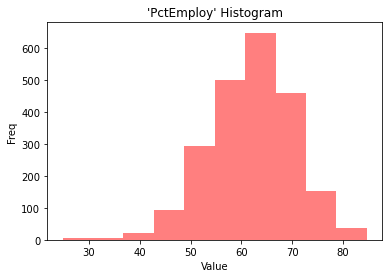

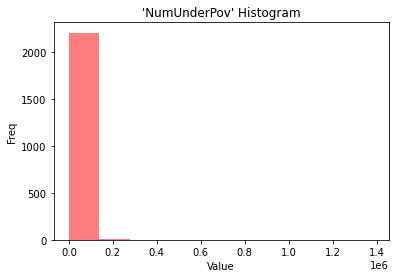

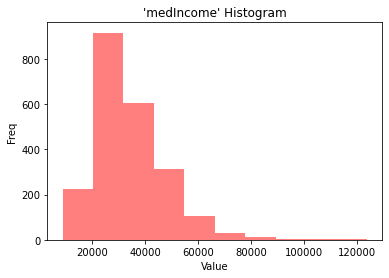

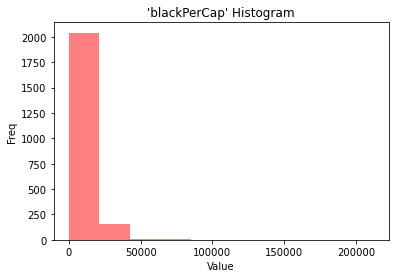

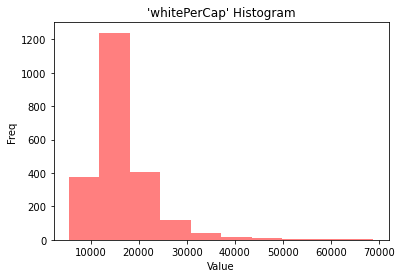

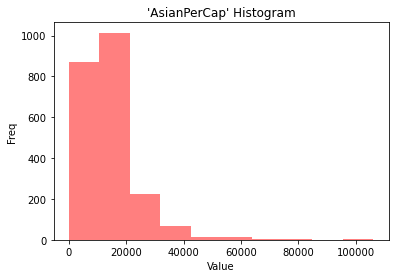

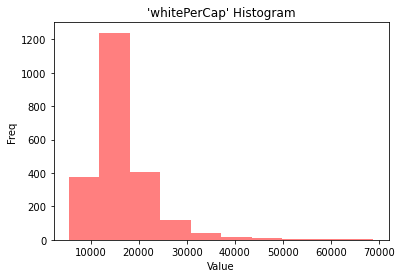

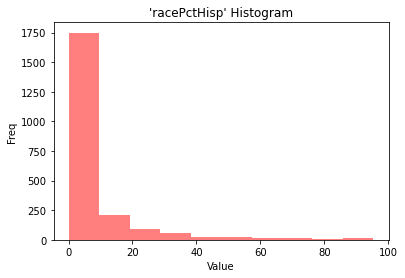

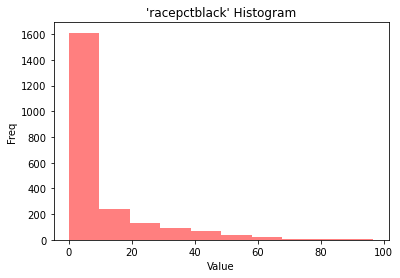

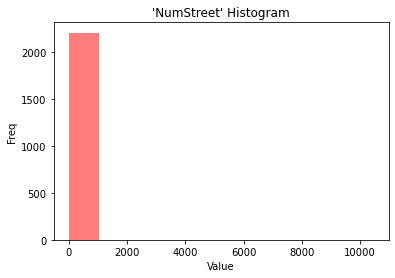

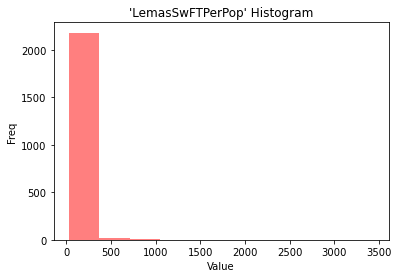

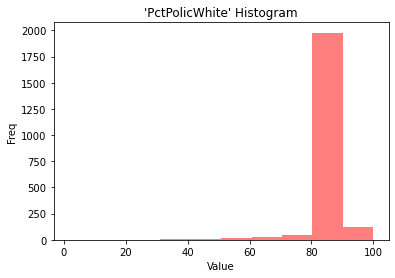

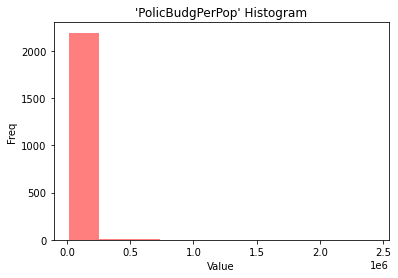

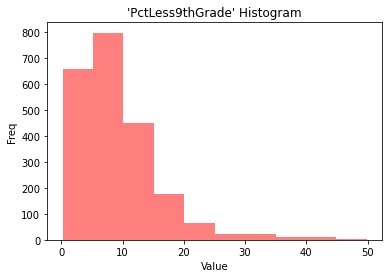

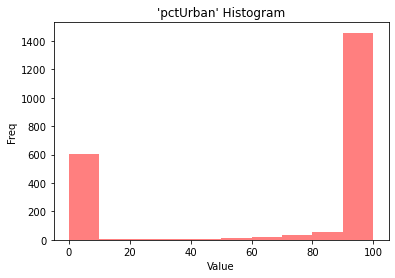

In [11]:
# plot histograms using peplos in marplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def histo_plot(x):
    plt.hist(x,color='red', alpha=0.5)
    plt.title("'{var_name}' Histogram".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.show()
    
# plot histograms to show the distributions of given features
histo_plot(x['PctEmploy'])
histo_plot(x['NumUnderPov'])
histo_plot(x['medIncome'])
histo_plot(x['blackPerCap'])
histo_plot(x['whitePerCap'])
histo_plot(x['AsianPerCap'])
histo_plot(x['whitePerCap'])
histo_plot(x['racePctHisp'])
histo_plot(x['racepctblack'])
histo_plot(x['NumStreet'])
histo_plot(x['LemasSwFTPerPop'])
histo_plot(x['PctPolicWhite'])
histo_plot(x['PolicBudgPerPop'])
histo_plot(x['PctLess9thGrade'])
histo_plot(x['pctUrban'])

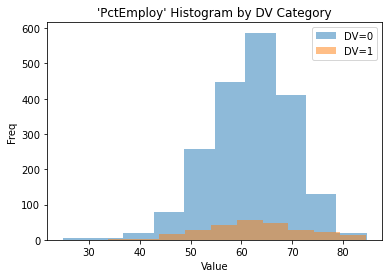

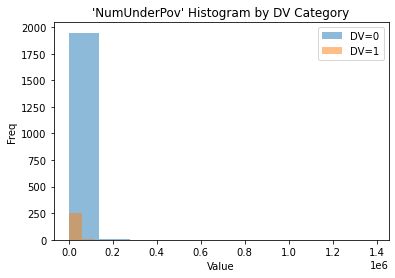

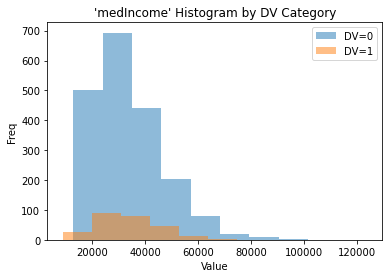

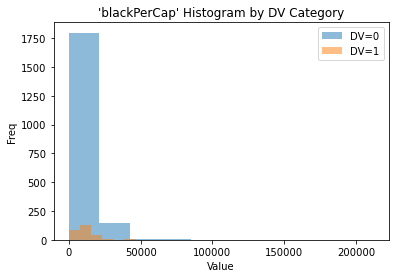

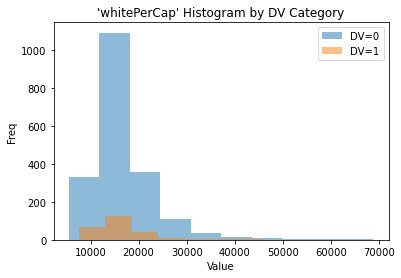

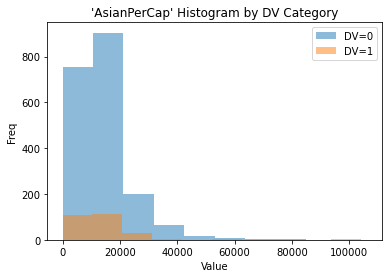

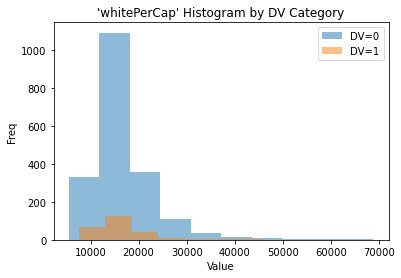

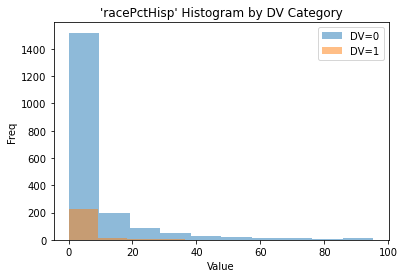

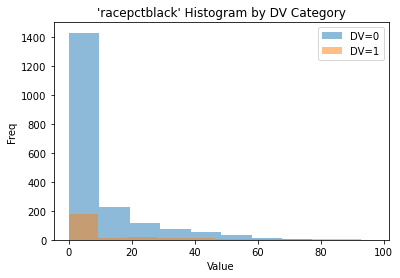

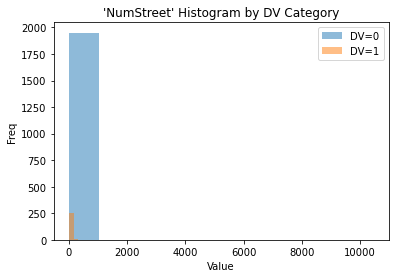

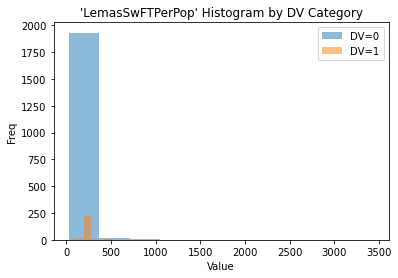

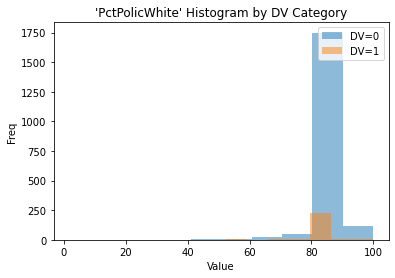

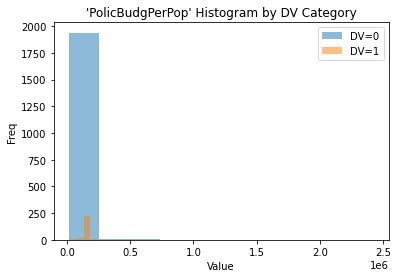

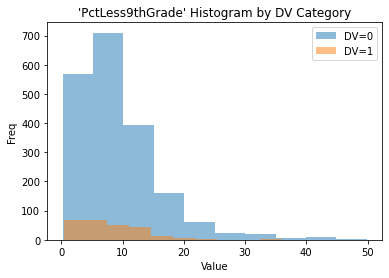

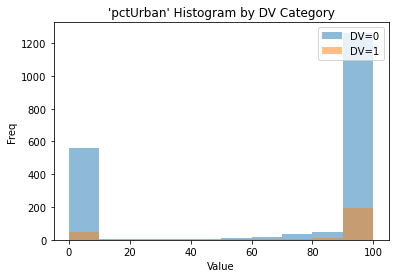

In [12]:
# histograms showing the distribution of features by the outcome variable (dependent variable)
def histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='DV=1')
    plt.title("'{var_name}' Histogram by DV Category".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.legend(loc='upper right')
    plt.show()
    
# these show the distribution of a feature when the outcome is 0, so crime is less than .../none
histogram_dv(x['PctEmploy'], y)
histogram_dv(x['NumUnderPov'], y)
histogram_dv(x['medIncome'], y)
histogram_dv(x['blackPerCap'], y)
histogram_dv(x['whitePerCap'], y)
histogram_dv(x['AsianPerCap'], y)
histogram_dv(x['whitePerCap'], y)
histogram_dv(x['racePctHisp'], y)
histogram_dv(x['racepctblack'], y)
histogram_dv(x['NumStreet'], y)
histogram_dv(x['LemasSwFTPerPop'], y)
histogram_dv(x['PctPolicWhite'], y)
histogram_dv(x['PolicBudgPerPop'], y)
histogram_dv(x['PctLess9thGrade'], y)
histogram_dv(x['pctUrban'], y)

Feature Engineering- 
Either 1. increase the dimensionality or 2. decrease the dimentionality

1. Increasing Dimensionality
= creating new features. This is useful if the impact of two or more features on the outcome is non-additive. A good automated way to do this is to look for interactions between features. 

e.g. a simple 2-way interaction (where X3 is the interaction between X1 and X2):

X3-X1 * X2

However, with lots of features, this grows the data A LOT. Therefore, it is better t use domain knowledge about certain interactions between features so that there aren't too many interaction terms. 

Dimensionality has benefits because information is added, however, it is computationally costly i.e. inefficient and also has the potential for overfitting the model. So it is a trade off between creating new useful information vs the potential for overfitting plus the computational cost. 

In [ ]:
# polynomialFeatures in sklearn.preprocessing to create two-way interactions for ALL features
# ??! maybe better if two way interactions are created only for SOME features, bc the data set is so large. Way too computationally slow. 
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]

    # establish the interactions in the data
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # remove the interactions with 0 values
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)

    return df


x = add_interactions(x)
print(x.head(5))

2. Decreasing dimensionality

Using principal component analysis(PCA), a method that transforms a dataset with many features into its principle components that best summarise the underlying variance in the data. 

Each ‘principle component’ is  established by finding the linear combination of features that maximises variance, whilst also ensuring zero correlation with previously calculated principal components. 

PCA/ decreasing dimensionality is useful when you have very high-dimensionality data, in order to reduce dimensions, when the dataset has many highly correlated variables because it will take the variance from these to reduce this correlation and when there is poor observation-to-feature ratio. 

However, using dimensionality reduction makes the data harder to interpret and understand because the output gives arbitrary principle components, e.g. for interpreting the outcome, principle component number 1 is not as easy to interpret as medIncome. Therefore, in certain contexts, like explaining the results to a client, this would make it difficult to explain the drivers of the target outcome variable.

In [13]:
# Using sklearn.decomposition PCA to find the principal components 
from sklearn.decomposition import PCA

# transform entire data set into 10 features
pca = PCA(n_components=10)
x_pca = pd.DataFrame(pca.fit_transform(x))

print(x_pca.head(5))

            0              1              2             3             4  \
0 -239.771784   16816.764930  -90883.562868  24490.657624 -21461.715379   
1 -192.466561  -42915.422243   28042.591047  13310.800930 -10903.109237   
2 -372.969528  -99214.537084   83408.474699  24250.498383 -18813.952233   
3 -396.202518 -107592.259906   92513.974401  25454.727718 -19587.510097   
4  767.669511   31668.115210  137546.869030 -69705.394227  58231.008226   

             5             6             7             8             9  
0 -6356.703651  14753.510998   -302.252406   3142.780842  -7970.706961  
1 -5553.961039  10006.849787   -163.472357   1637.516314  12897.250813  
2 -1847.068267  -2247.183394   5702.615622 -17114.398655  -7679.715608  
3 -1204.795946  -4080.450683   5289.007321 -42068.441306  -8498.908242  
4  2431.515196      6.329252 -20302.685747    492.476107  -2357.557030  


Feature Selection
- Build the model using the pre-processed data

In order to avoid overfitting and slow computing (due to the increase in features from dummying as well as increasing dimensionality), selecting the most important features is important. 

In [14]:
# Split the data into training and test data sets using sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=1)

In [15]:
# check the dataset to see how much the dataset has grown (if dimenstionality was increased)
print(data.shape)
print(x.shape)

(2214, 147)
(2214, 2209)


In [16]:
import sklearn.feature_selection

# select k best is a univariate method:
# looks at the outcome and the relationship with each feature and selects k number of best features 
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x.columns[I] for I in indices_selected]

x_train_selected = x_train[colnames_selected]
x_test_selected = x_test[colnames_selected]

colnames_selected

/Users/emilybirch/opt/anaconda3/envs/scikit_ML/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 152  159  202  207  221  222  224  232  240  241  252  255  256  257
  264  265  267  280  285  287  288  289  291  292  298  306  309  311
  313  314  315  321  323  326  327  332  337  338  344  347  350  353
  354  355  359  360  363  364  369  370  372  379  380  382  383  390
  401  408  409  416  417  421  422  426  429  433  439  441  450  453
  460  466  468  470  476  479  483  485  487  488  489  490  498  500
  503  506  508  523  525  531  533  534  536  539  542  548  563  569
  575  577  578  582  586  590  596  598  599  600  605  619  621  627
  629  630  632  639  641  643  649  651  654  656  658  660  665  668
  669  676  678  685  692  694  698  700  702  703  711  718  719  721
  724  725  729  733  734  736  739  744  765  767  769  771  772  774
  776  781  783  784  790  802  803  807  810  813  816  817  823 

['countyCode',
 'PctEmplManu',
 'PctKidsBornNeverMar',
 'PctPersOwnOccup',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'OwnOccHiQuart',
 'MedOwnCostPctInc',
 'PctBornSameState',
 'PctSameCity85',
 'PctSameState85',
 'PctPolicBlack',
 'murdPerPop',
 'rapesPerPop',
 'robbbPerPop',
 'assaultPerPop',
 'autoTheftPerPop',
 'state_IL',
 'state_MI',
 'state_MN']

Model accuracy:  0.9864661654135338


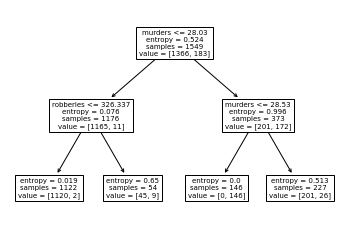

In [52]:
# build the decision tree
from sklearn import tree
# import graphviz

# use the entropy rather than gini index
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree = dtree.fit(x_train, y_train)


tree.plot_tree(dtree, feature_names=data.columns) 

# most stylised tree:
# dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data) 
# graph



# model can then be used to predict !
# crime_predict = dtree.predict([[0,1]])


# assess accuracy at this stage
from sklearn.metrics import accuracy_score

print("Model accuracy: ",accuracy_score(y_test, crime_predict))


Post-pruning with cost-complexity pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

Total impurity of leaves vs effective alphas of pruned tree:

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.

scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

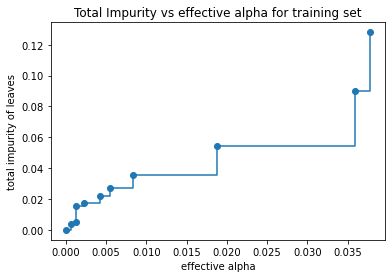

In [37]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
# the maximum effective alpha value is removed, because it is the trivial tree with only one node.


In [45]:
# Next, we train a decision tree using the effective alphas. 
# The last value in ccp_alphas is the alpha value that prunes the whole tree, 
# this leaves the tree, clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08024895842462651


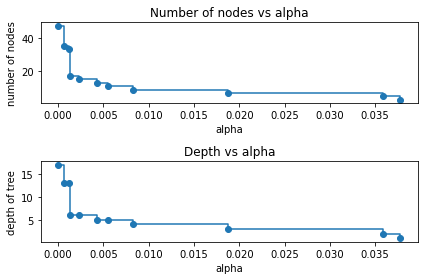

In [46]:
# remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. 
# show that the number of nodes and tree depth decreases as alpha increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

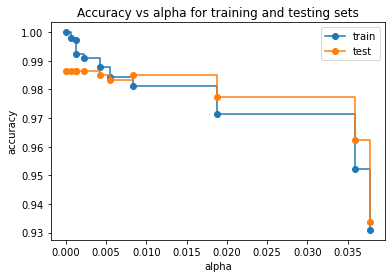

In [47]:
# Accuracy vs alpha for training 
# When ccp_alpha is set to zero, the tree overfits
# leading to a 100% training accuracy and 88% testing accuracy. 
# As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. 
# In this example, setting ccp_alpha=0..... maximizes the testing accuracy. ??!


train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()